Nivell 1
- Exercici 1
Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

- Exercici 2
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

Nivell 2
- Exercici 1
Treu les stopwords i realitza stemming al teu conjunt de dades.



# EXERCICI 1

In [1]:
# Grid Search for Algorithm Tuning: testing values as if it behaves like a grid map
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# load the diabetes datasets 
dataset = datasets.load_diabetes() #diabetes ja ve normalitzat

RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [2]:
# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(dataset.data, dataset.target,test_size=0.2,random_state=1)

# shape check of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((353, 10), (89, 10), (353,), (89,))

In [3]:
# pipeline
# standardize input
# create an object of the RandomForestRegressor model
#@model_RFR = RandomForestRegressor()

steps = [('scaler', StandardScaler()), ('RFR', RandomForestRegressor())]
pipeline = Pipeline(steps) 

In [4]:
pipeline.get_params().keys() #check

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'RFR', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'RFR__bootstrap', 'RFR__ccp_alpha', 'RFR__criterion', 'RFR__max_depth', 'RFR__max_features', 'RFR__max_leaf_nodes', 'RFR__max_samples', 'RFR__min_impurity_decrease', 'RFR__min_samples_leaf', 'RFR__min_samples_split', 'RFR__min_weight_fraction_leaf', 'RFR__n_estimators', 'RFR__n_jobs', 'RFR__oob_score', 'RFR__random_state', 'RFR__verbose', 'RFR__warm_start'])

In [5]:
#PRE: requires numpy arrays: normalized data + raw target

# prepare a range of param values to test
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)] #max levels on each tree
n_estimators = np.array([10,9,8,7,6,5,4,3,2,1]) #[int(x) for x in np.linspace(start = 1, stop = 10, num = 1)] #number of trees in the RFR
max_features = np.array([10,9,8,7,6,5,4,3,2,1]) #['auto', 'sqrt'] #features=np.array([10,9,8,7,6,5,4,3,2,1]) # #of features ot consider on each split
bootstrap = [True, False] # method of selecting samples for training each tree
min_samples_split = [2, 5, 10] # Min samples required to split a node

params=dict(RFR__max_depth=max_depth, RFR__n_estimators=n_estimators, RFR__max_features=max_features,
            RFR__bootstrap=bootstrap, RFR__min_samples_split=min_samples_split)

#testing each set (it requires some time. cv defines the number of FOLDS, but I randomize on pipeline())
grid = GridSearchCV(pipeline, param_grid=params, cv=5)
grid.fit(dataset.data, dataset.target)
print(grid)

# summarize the results of the grid search
print('grid.best_score')
print(grid.best_score_)
print (grid.best_params_)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RFR', RandomForestRegressor())]),
             param_grid={'RFR__bootstrap': [True, False],
                         'RFR__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'RFR__max_features': array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1]),
                         'RFR__min_samples_split': [2, 5, 10],
                         'RFR__n_estimators': array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])})
grid.best_score
0.461627562848039
{'RFR__bootstrap': True, 'RFR__max_depth': 5, 'RFR__max_features': 3, 'RFR__min_samples_split': 10, 'RFR__n_estimators': 9}


# com més toques els hiperparametres sense saber què busques, mé fàcil és cagar-la. Poso resultats amb menys manipulacions a sota

# ALERTA  com que 
# RANDOMSTATE no esta fixat, els parametres varien per a cada RUN

In [6]:
# fit the model with the training data
model_RFR = RandomForestRegressor(max_depth=5, n_estimators=8 )  
model_RFR.fit(train_x, train_y)

# predict the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Root Mean Squared Error on random test and train (2 random datasets)
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  40.67185228047081
RMSE on test data:  62.52875063960937


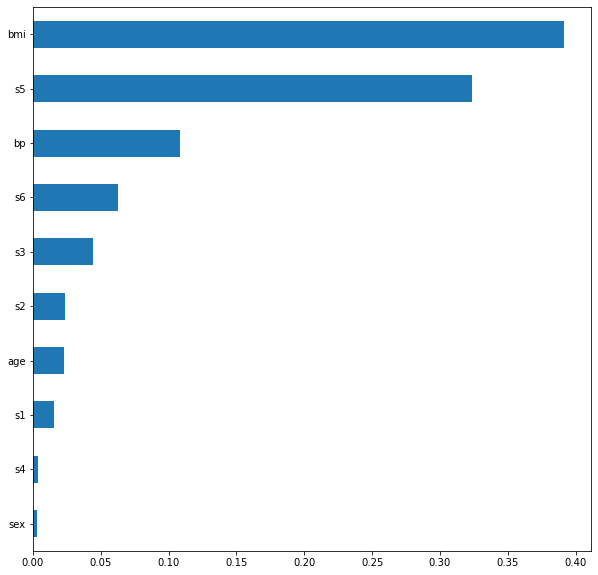

In [7]:
# plot the features reordenades al revés (nlargest --- nsmallest)
#amb 5 features vas sobrat

plt.figure(figsize=(10,10))
feat_importances = pd.Series(model_RFR.feature_importances_, index = dataset.feature_names)
feat_importances.nsmallest(10).plot(kind='barh');

# EXERCICI 2

In [8]:
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
from nltk.tokenize import sent_tokenize

book=open("fkafka.txt", encoding="utf-8")
text=book.read()  #readline() – read the text file line by line and return all the lines as strings.
                #readlines() – read all the lines of the text file and return them as a list of strings.
book.close()

tokenized_text=sent_tokenize(text)
#print(tokenized_text)

In [9]:
print(tokenized_text)

['\ufeffThe Project Gutenberg eBook of Metamorphosis, by Franz Kafka\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever.', 'You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org.', 'If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.', '** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **\n**     Please follow the copyright guidelines in this file.', '**\n\nTitle: Metamorphosis\n\nAuthor: Franz Kafka\n\nTranslator: David Wyllie\n\nRelease Date: May 13, 2002 [eBook #5200]\n[Most recently updated: May 20, 2012]\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\nCopyright (C) 2002 by David Wyllie.', '*** START OF THE PROJECT GUTENBERG EBOOK METAMORPHOSIS ***\n\n\n\n\nMetamorphosis\

#### datasets de https://www.ics.uci.edu/~smyth/courses/cs175/text_data_sets.html

In [10]:
#hauria d'eliminar tots els \n i \u per començar, canviant-los per BLANKs
#caldria fer un FOR durant tot el tokenized_text 

tokens = nltk.word_tokenize(tokenized_text[500]) #frase escollida a l'atzar
tokens

['Gregor',
 'would',
 'often',
 'spend',
 'the',
 'whole',
 'evening',
 'looking',
 'at',
 'all',
 'the',
 'stains',
 'on',
 'this',
 'coat',
 ',',
 'with',
 'its',
 'gold',
 'buttons',
 'always',
 'kept',
 'polished',
 'and',
 'shiny',
 ',',
 'while',
 'the',
 'old',
 'man',
 'in',
 'it',
 'would',
 'sleep',
 ',',
 'highly',
 'uncomfortable',
 'but',
 'peaceful',
 '.']

In [11]:
### TAG per cada particula
tagged = nltk.pos_tag(tokens)
tagged[0:15]

[('Gregor', 'NNP'),
 ('would', 'MD'),
 ('often', 'RB'),
 ('spend', 'VB'),
 ('the', 'DT'),
 ('whole', 'NN'),
 ('evening', 'VBG'),
 ('looking', 'VBG'),
 ('at', 'IN'),
 ('all', 'PDT'),
 ('the', 'DT'),
 ('stains', 'NNS'),
 ('on', 'IN'),
 ('this', 'DT'),
 ('coat', 'NN')]

In [12]:
from nltk.tokenize import word_tokenize

tokenized_word=word_tokenize(text)

print(tokenized_word)

['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'of', 'Metamorphosis', ',', 'by', 'Franz', 'Kafka', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org', '.', 'If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States', ',', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'eBook', '.', '*', '*', 'This', 'is', 'a', 'COPYRIGHTED', 'Project', 'Gutenberg', 'eBook', ',', 'Details', 'Below', '*', '*', '*', '*', 'Please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'f

In [13]:
#mètode més potent, i genera molta més brossa

In [14]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 3390 samples and 28681 outcomes>


In [15]:
fdist.most_common(50)

[(',', 1439),
 ('the', 1276),
 ('to', 829),
 ('.', 803),
 ('and', 674),
 ('of', 545),
 ('his', 523),
 ('he', 497),
 ('was', 407),
 ('in', 400),
 ('had', 348),
 ('a', 341),
 ('that', 340),
 ('it', 335),
 ('’', 331),
 ('Gregor', 298),
 ('as', 243),
 ('with', 240),
 ('not', 204),
 ('s', 194),
 ('him', 186),
 ('would', 183),
 ('her', 182),
 ('for', 181),
 ('she', 173),
 ('at', 172),
 (';', 170),
 ('on', 160),
 ('all', 145),
 ('they', 139),
 ('but', 138),
 ('be', 134),
 ('from', 131),
 ('“', 131),
 ('”', 131),
 ('room', 129),
 ('this', 120),
 ('could', 119),
 ('have', 113),
 ('or', 111),
 ('out', 111),
 ('you', 106),
 ('sister', 101),
 ('been', 100),
 ('father', 99),
 ('there', 97),
 ('if', 91),
 ('I', 90),
 ('Project', 86),
 ('door', 86)]

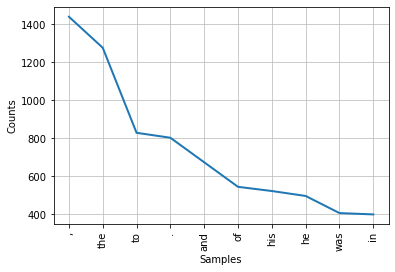

In [16]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(10,cumulative=False)
plt.show()

# EXERCICI 3

In [17]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'y', 'into', 'same', 'again', 'what', "hadn't", 'nor', "wouldn't", 'at', "weren't", 'doing', 'i', "that'll", "didn't", 'did', 'both', 'been', 'myself', 'does', 'ourselves', "wasn't", 'for', 'then', 'such', 'most', 'isn', 'll', "doesn't", 'how', 'his', "mightn't", 'so', 'yourself', "you're", 'while', 'further', 'your', 'own', "you'd", 'shouldn', 'they', 'of', 'ain', 'from', 'have', 'ours', "it's", "mustn't", 'who', 'having', 'until', 'is', 's', 'and', 'be', 'during', 'no', 'hasn', 'you', "couldn't", 'there', 'where', 'am', 'those', 'yourselves', "aren't", 'he', 'can', 'mightn', 'needn', "won't", 'wouldn', 'my', 'himself', 'on', 'being', 'other', 'didn', 'as', 're', 'which', 'has', 'here', 'out', 'were', 'all', 'not', 'any', 'itself', 'won', 'haven', "needn't", 'was', 'very', 'm', 'only', 'than', "haven't", "should've", 'its', 'down', 'mustn', 'whom', 'do', 'off', "shan't", 'her', "don't", 'too', 'will', 've', 'we', 'by', 'up', 't', 'that', 'in', 'hadn', 'are', 'after', 'it', 'against',

In [18]:
appendix={',','the','to', '.', 'and', 'of','his', 'he','was','in','had', 'a', 'that','it','’',
                  'as','with', ';', ';', 'on','on','s', '”', ',', '.', '’', '“', '”','i'}

### Setting up a filter to the whole TEXT not a single sentence

In [19]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        if w not in appendix:
            filtered_sent.append(w)
#print("Tokenized Sentence:",tokenized_word)
print("Filtered Sentence:",filtered_sent)

Filtered Sentence: ['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'Metamorphosis', 'Franz', 'Kafka', 'This', 'eBook', 'use', 'anyone', 'anywhere', 'United', 'States', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'give', 'away', 're-use', 'terms', 'Project', 'Gutenberg', 'License', 'included', 'eBook', 'online', 'www.gutenberg.org', 'If', 'located', 'United', 'States', 'check', 'laws', 'country', 'located', 'using', 'eBook', '*', '*', 'This', 'COPYRIGHTED', 'Project', 'Gutenberg', 'eBook', 'Details', 'Below', '*', '*', '*', '*', 'Please', 'follow', 'copyright', 'guidelines', 'file', '*', '*', 'Title', ':', 'Metamorphosis', 'Author', ':', 'Franz', 'Kafka', 'Translator', ':', 'David', 'Wyllie', 'Release', 'Date', ':', 'May', '13', '2002', '[', 'eBook', '#', '5200', ']', '[', 'Most', 'recently', 'updated', ':', 'May', '20', '2012', ']', 'Language', ':', 'English', 'Character', 'set', 'encoding', ':', 'UTF-8', 'Copyright', '(', 'C', ')', '2002', 'D

In [20]:
#after cleaning, more preprocessing, removing suffixes

# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Stemmed Sentence:",stemmed_words)

Stemmed Sentence: ['\ufeffthe', 'project', 'gutenberg', 'ebook', 'metamorphosi', 'franz', 'kafka', 'thi', 'ebook', 'use', 'anyon', 'anywher', 'unit', 'state', 'part', 'world', 'cost', 'almost', 'restrict', 'whatsoev', 'you', 'may', 'copi', 'give', 'away', 're-us', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'www.gutenberg.org', 'if', 'locat', 'unit', 'state', 'check', 'law', 'countri', 'locat', 'use', 'ebook', '*', '*', 'thi', 'copyright', 'project', 'gutenberg', 'ebook', 'detail', 'below', '*', '*', '*', '*', 'pleas', 'follow', 'copyright', 'guidelin', 'file', '*', '*', 'titl', ':', 'metamorphosi', 'author', ':', 'franz', 'kafka', 'translat', ':', 'david', 'wylli', 'releas', 'date', ':', 'may', '13', '2002', '[', 'ebook', '#', '5200', ']', '[', 'most', 'recent', 'updat', ':', 'may', '20', '2012', ']', 'languag', ':', 'english', 'charact', 'set', 'encod', ':', 'utf-8', 'copyright', '(', 'c', ')', '2002', 'david', 'wylli', '*', '*', '*', 'start', 'of', 'the', '

In [21]:
### getting the base word (Lemma)

#Lexicon Normalization
#performing Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

lemma_words=[]
for w in stemmed_words:
    lemma_words.append(lem.lemmatize(w,"v"))

print("Lemma Words:",lemma_words)

Lemma Words: ['\ufeffthe', 'project', 'gutenberg', 'ebook', 'metamorphosi', 'franz', 'kafka', 'thi', 'ebook', 'use', 'anyon', 'anywher', 'unit', 'state', 'part', 'world', 'cost', 'almost', 'restrict', 'whatsoev', 'you', 'may', 'copi', 'give', 'away', 're-us', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'www.gutenberg.org', 'if', 'locat', 'unit', 'state', 'check', 'law', 'countri', 'locat', 'use', 'ebook', '*', '*', 'thi', 'copyright', 'project', 'gutenberg', 'ebook', 'detail', 'below', '*', '*', '*', '*', 'pleas', 'follow', 'copyright', 'guidelin', 'file', '*', '*', 'titl', ':', 'metamorphosi', 'author', ':', 'franz', 'kafka', 'translat', ':', 'david', 'wylli', 'releas', 'date', ':', 'may', '13', '2002', '[', 'ebook', '#', '5200', ']', '[', 'most', 'recent', 'updat', ':', 'may', '20', '2012', ']', 'languag', ':', 'english', 'charact', 'set', 'encod', ':', 'utf-8', 'copyright', '(', 'c', ')', '2002', 'david', 'wylli', '*', '*', '*', 'start', 'of', 'the', 'proje

In [22]:
from nltk.probability import FreqDist
fdist = FreqDist(lemma_words)
print(fdist)

<FreqDist with 2308 samples and 12826 outcomes>


In [23]:
fdist.most_common(50)

[('gregor', 298),
 ('would', 186),
 ('room', 131),
 ('could', 119),
 ('work', 113),
 ('even', 104),
 ('father', 102),
 ('sister', 101),
 ('door', 96),
 ('project', 90),
 ('i', 90),
 ('mother', 89),
 ('go', 86),
 ('he', 85),
 ('back', 83),
 ('make', 80),
 ('time', 74),
 ('get', 73),
 ('say', 73),
 ('come', 70),
 ('the', 68),
 ('way', 65),
 ('one', 61),
 ('look', 61),
 ('think', 59),
 ('take', 56),
 ('gutenberg-tm', 56),
 ('use', 55),
 ('see', 55),
 ('?', 55),
 ('open', 55),
 ('littl', 49),
 ('without', 47),
 ('still', 45),
 ('!', 44),
 ('first', 44),
 ('want', 44),
 ('it', 42),
 ('like', 41),
 ('hand', 40),
 ('head', 39),
 ('much', 39),
 (':', 38),
 ('thing', 38),
 ('move', 38),
 ('day', 37),
 ('chief', 37),
 ('clerk', 37),
 ('state', 36),
 ('turn', 36)]

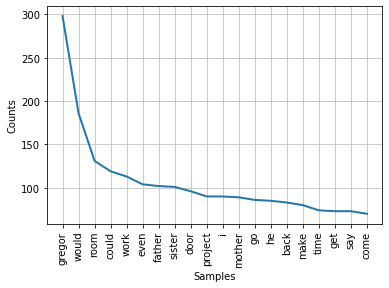

In [151]:
# Frequency Distribution Plot, quite a good summary on the metamorphosis key characters and scenario
import matplotlib.pyplot as plt
fdist.plot(20,cumulative=False)
plt.show()

# EXERCICI 4


In [13]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob
from nltk.corpus import sentiwordnet
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from statistics import mean

In [14]:
text=tokenized_text[500] #frase escollida a l'atzar
text

'Gregor would often spend the whole\nevening looking at all the stains on this coat, with its gold buttons\nalways kept polished and shiny, while the old man in it would sleep,\nhighly uncomfortable but peaceful.'

In [15]:
# netejant puntuacions i signes especials
clean_text = re.sub('[^A-Za-z]+', ' ', text)

# es tokenitza la frase
text_words = word_tokenize(clean_text)

print(text_words)

['Gregor', 'would', 'often', 'spend', 'the', 'whole', 'evening', 'looking', 'at', 'all', 'the', 'stains', 'on', 'this', 'coat', 'with', 'its', 'gold', 'buttons', 'always', 'kept', 'polished', 'and', 'shiny', 'while', 'the', 'old', 'man', 'in', 'it', 'would', 'sleep', 'highly', 'uncomfortable', 'but', 'peaceful']


In [16]:
#eliminant les stopwords, carrega paraules, elimina i desa text filtrat

stop_words = set(stopwords.words('english'))
filtered_text_words = []

## segur que hi ha una manera de fer-ho vectoritzada. Per ara estiro de FOR, el mecanisme més lent de tots
for word in text_words:
    if word.lower() not in stop_words:
        filtered_text_words.append(word)
        
print(filtered_text_words)

['Gregor', 'would', 'often', 'spend', 'whole', 'evening', 'looking', 'stains', 'coat', 'gold', 'buttons', 'always', 'kept', 'polished', 'shiny', 'old', 'man', 'would', 'sleep', 'highly', 'uncomfortable', 'peaceful']


In [17]:
#classifiquem les paraules en una llista etiquetada per tipus de paraula
tagged_text_words = pos_tag(filtered_text_words)

retagged_text_words = []
tag_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

for word, tag in tagged_text_words:
    retagged_text_words.append(list([word, tag_dict.get(tag[0])]))
    
retagged_text_words 

[['Gregor', 'n'],
 ['would', None],
 ['often', 'r'],
 ['spend', 'v'],
 ['whole', 'a'],
 ['evening', 'n'],
 ['looking', 'v'],
 ['stains', 'n'],
 ['coat', 'v'],
 ['gold', 'n'],
 ['buttons', 'n'],
 ['always', 'r'],
 ['kept', 'v'],
 ['polished', 'a'],
 ['shiny', 'a'],
 ['old', 'a'],
 ['man', 'n'],
 ['would', None],
 ['sleep', 'v'],
 ['highly', 'r'],
 ['uncomfortable', 'a'],
 ['peaceful', 'n']]

In [21]:
#generant un nou DF on posar els resultats de cada paraula

sentiwordnet_df = pd.DataFrame(columns=['WORD','POSITIVE','NEGATIVE','OBJECTIVITY'])

In [22]:
#es passa la llibreria WordNetLemmatizer per normalitzar +/- el sentiment de cada paraula
for word, tag in retagged_text_words:
    if not tag:
        lemma = word
    else:
        lemma = WordNetLemmatizer().lemmatize(word, pos=tag)
    sysnets = sentiwordnet.senti_synsets(lemma, tag)
    # Es tracten els errors amb "try/except" perquè força paraules no estan a la llibreria:
    try:
        first_sysnet = list(sysnets)[0]
        sentiwordnet_df.loc[len(sentiwordnet_df)] = [lemma, first_sysnet.pos_score(), first_sysnet.neg_score(), first_sysnet.obj_score()]
    except Exception:
        continue

sentiwordnet_df

,WORD,POSITIVE,NEGATIVE,OBJECTIVITY
0,often,0.000,0.000,1.000
1,spend,0.125,0.000,0.875
2,whole,0.125,0.000,0.875
3,evening,0.000,0.000,1.000
4,look,0.000,0.000,1.000
5,stain,0.000,0.750,0.250
6,coat,0.000,0.000,1.000
7,gold,0.000,0.000,1.000
8,button,0.000,0.000,1.000
9,always,0.000,0.000,1.000


In [26]:
print(f"Objectivity: {sentiwordnet_df['OBJECTIVITY'].mean()}") #.round(3)
print(f"Positivity: {sentiwordnet_df['POSITIVE'].sum()}")
print(f"Negativity: {sentiwordnet_df['NEGATIVE'].sum()}")

#és millor posar els resultats en un DF que acumular els resultats, perquè aixi es pot tenir una mitja.
#altrament es podria fer servir 3 llistes separades

Objectivity: 0.7986111111111112
Positivity: 2.0
Negativity: 1.625


In [27]:
print(f"Positivity/Negativity Balance: {(sentiwordnet_df['POSITIVE'].sum() - sentiwordnet_df['NEGATIVE'].sum())}")


Positivity/Negativity Balance: 0.375


In [28]:
## anem a calcular objectivitat
sentiment_result = 0
objectivity = []

In [29]:
for word, tag in retagged_text_words:
    if not tag:
        lemma = word
    else:
        lemma = WordNetLemmatizer().lemmatize(word, pos=tag)
    sysnets = sentiwordnet.senti_synsets(lemma, tag)
    # Es necesario un "try/except" porque algunas palabras pueden no tener resultados:
    try:
        first_sysnet = list(sysnets)[0]
        sentiment_result += first_sysnet.pos_score() - first_sysnet.neg_score()
        objectivity.append(first_sysnet.obj_score())
    except Exception:
        continue

print(f"Objectivity: {round(mean(objectivity),3)}")
print(f"Positivity/Negativity Balance: {sentiment_result}")


Objectivity: 0.799
Positivity/Negativity Balance: 0.375


In [30]:
## ALTERNATIVA: sentiment sobre el text complet: llibreria TEXTBLOB
# tornem a començar amb string inicial

lemmatized_text = ""

#lemmatitzat i concatenat a la variable generada
for word, tag in retagged_text_words:
    if not tag:
        lemma = word
    else:
        lemma = WordNetLemmatizer().lemmatize(word, pos=tag)
    lemmatized_text = lemmatized_text + " " + lemma    

print(lemmatized_text)

 Gregor would often spend whole evening look stain coat gold button always keep polished shiny old man would sleep highly uncomfortable peaceful


In [31]:
sent_analysis = TextBlob(lemmatized_text)

sent_analysis.sentiment

### apliquem VADERsentiment, un aaltra llibreria

Sentiment(polarity=0.012500000000000011, subjectivity=0.525)

In [33]:
sent_analysis = SentimentIntensityAnalyzer().polarity_scores(lemmatized_text)
sent_analysis 

{'neg': 0.11, 'neu': 0.758, 'pos': 0.132, 'compound': 0.1494}

# caldria fer un sentiment analysis sobre uns textos degudament etiquetats. Aixi a la babalà surten resultats que tampoc val la pena comentar
# de fet, ni tan sols un humà pot validar com quan de positiva o negativa és la frase.
# té sentit en tweets, reviews, i mercadotècnia, amb una llibreria entrenada, degudament taggejada. En una frase amb una llibreria desconeguda, els resultats son els que son.
# hi ha veritats, mentides i Big Data. Tots els resultats son precisos, però poden faltar molt a la realitat